In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import io, models, plot, train

io.logger_setup()

train_dir = '/Users/noah/Downloads/Finetune/Training'
test_dir = '/Users/noah/Downloads/Finetune/Validation'



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


2025-05-21 19:47:52,654 [INFO] WRITING LOG OUTPUT TO /Users/noah/.cellpose/run.log
2025-05-21 19:47:52,655 [INFO] 
cellpose version: 	4.0.2 
platform:       	darwin 
python version: 	3.12.9 
torch version:  	2.7.0


In [ ]:
output = io.load_train_test_data(train_dir, test_dir, image_filter="_img",
                                mask_filter="_seg.npy", look_one_level_down=False)
images, labels, image_names, test_images, test_labels, image_names_test = output

model = models.CellposeModel(gpu=True)

model_path, train_losses, test_losses = train.train_seg(model.net,
                            train_data=images, train_labels=labels,
                            test_data=test_images, test_labels=test_labels,
                            weight_decay=0.1, learning_rate=1e-5,
                            n_epochs=100, model_name="finetune 100 epochs")

2025-05-21 19:47:52,662 [INFO] not all flows are present, running flow generation for all images
2025-05-21 19:47:52,768 [INFO] 21 / 21 images in /Users/noah/Downloads/Finetune/Training folder have labels
2025-05-21 19:47:52,770 [INFO] not all flows are present, running flow generation for all images
2025-05-21 19:47:52,789 [INFO] 4 / 4 images in /Users/noah/Downloads/Finetune/Validation folder have labels
2025-05-21 19:47:52,803 [INFO] ** TORCH MPS version installed and working. **
2025-05-21 19:47:52,803 [INFO] >>>> using GPU (MPS)
2025-05-21 19:47:53,813 [INFO] >>>> loading model /Users/noah/.cellpose/models/cpsam
2025-05-21 19:47:54,197 [INFO] computing flows for labels


100%|██████████| 21/21 [00:21<00:00,  1.02s/it]

2025-05-21 19:48:15,652 [INFO] computing flows for labels



100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

2025-05-21 19:48:19,608 [INFO] >>> computing diameters



100%|██████████| 4/4 [00:00<00:00, 297.75it/s]

2025-05-21 19:48:19,694 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}


2025-05-21 19:48:20,594 [INFO] >>> n_epochs=100, n_train=21, n_test=4
2025-05-21 19:48:20,595 [INFO] >>> AdamW, learning_rate=0.00001, weight_decay=0.10000
2025-05-21 19:48:20,596 [INFO] >>> saving model to /Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune 100 epochs
2025-05-21 19:48:29,116 [INFO] 0, train_loss=2.5037, test_loss=1.1462, LR=0.000000, time 8.52s
2025-05-21 19:49:06,879 [INFO] 5, train_loss=1.7340, test_loss=0.9667, LR=0.000006, time 46.28s
2025-05-21 19:49:44,615 [INFO] 10, train_loss=1.5596, test_loss=0.9069, LR=0.000010, time 84.02s
2025-05-21 19:50:59,783 [INFO] 20, train_loss=1.3205, test_loss=0.8464, LR=0.000010, time 159.19s
2025-05-21 19:52:14,894 [INFO] 30, train_loss=1.3348, test_loss=0.9329, LR=0.000010, time 234.30s
2025-05-21 19:53:30,011 [INFO] 40, train_loss=1.3599, test_loss=0.8834, LR=0.000010, time 309.42s
2025-05-21 19:54:44,972 [INFO] 50, train_loss=1.2879, test_loss=1.0099, L

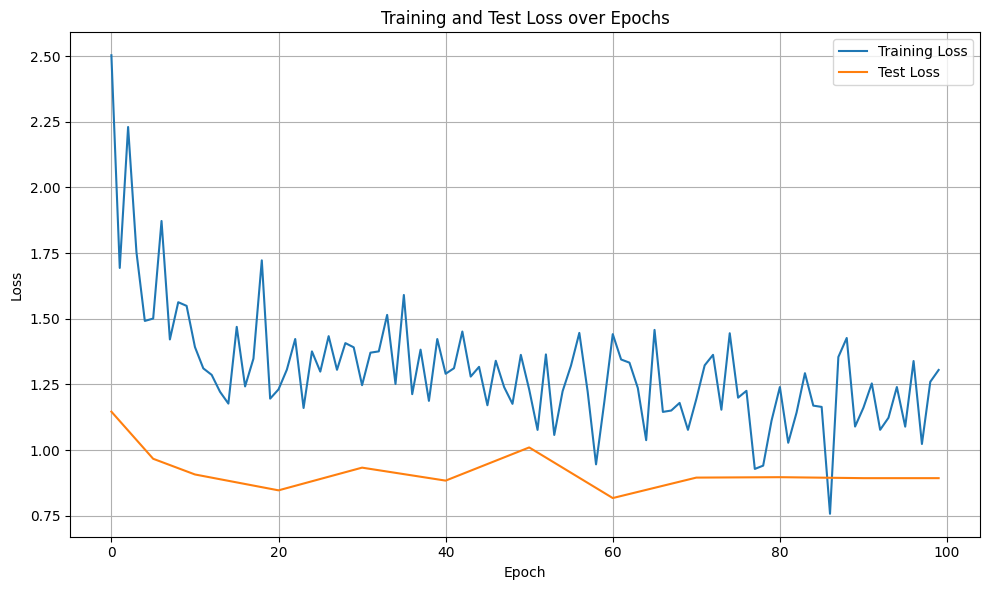

In [ ]:
x = np.arange(len(test_losses))
mask = test_losses != 0
test_losses_interp = np.interp(x, x[mask], test_losses[mask])
test_losses_interp

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses_interp, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2025-05-22 01:10:16,258 [WARNING] diam_mean argument are not used in v4.0.1+. Ignoring this argument...
2025-05-22 01:10:16,262 [INFO] ** TORCH MPS version installed and working. **
2025-05-22 01:10:16,263 [INFO] >>>> using GPU (MPS)
2025-05-22 01:10:19,219 [INFO] >>>> loading model models/finetune 100 epochs


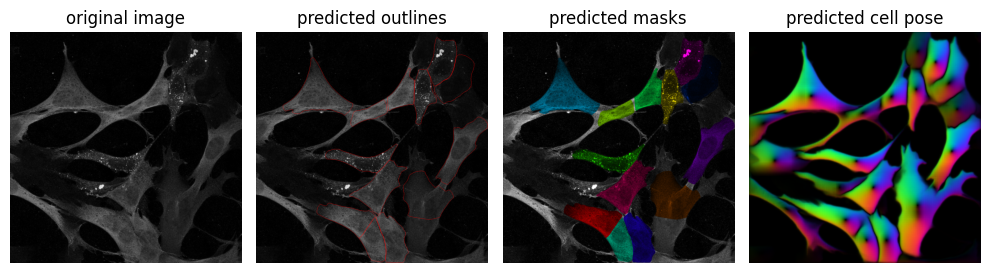

In [12]:
model = models.CellposeModel(pretrained_model='models/finetune 100 epochs',gpu=True, diam_mean=100)
img = io.imread('/Users/noah/Downloads/Finetune/Testing/8_img.tif')

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()